<a href="https://colab.research.google.com/github/fiftybucks101/Data-Science_2024/blob/main/EDA_%26_Feature_Engineering/Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df = sns.load_dataset('titanic')
display(df.head(2),df.sample(2),df.tail(2))

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
763,1,1,female,36.0,1,2,120.0000,S,First,woman,False,B,Southampton,yes,False
730,1,1,female,29.0,0,0,211.3375,S,First,woman,False,B,Southampton,yes,True


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.drop(columns=['survived','pclass','age','sibsp','parch','fare','deck'], inplace = True)

In [ ]:
df.head()

,sex,embarked,class,who,adult_male,embark_town,alive,alone
0,male,S,Third,man,True,Southampton,no,False
1,female,C,First,woman,False,Cherbourg,yes,False
2,female,S,Third,woman,False,Southampton,yes,True
3,female,S,First,woman,False,Southampton,yes,False
4,male,S,Third,man,True,Southampton,no,True


In [ ]:
ohe = OneHotEncoder() # inititlizing

ohe.fit_transform(df[['sex']]).toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [ ]:
gender = ohe.fit_transform(df[['sex']]).toarray()
gender.shape

(891, 2)

In [ ]:
categ = ohe.categories_
print(categ)

[array(['female', 'male'], dtype=object)]


In [ ]:
categ = np.array(ohe.categories_).ravel() # converts multidimensional array to single array

In [ ]:
print(categ)

['female' 'male']


In [ ]:
pd.DataFrame(gender,columns=categ)

,female,male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0
889,0.0,1.0


In [ ]:
df2 = pd.DataFrame(gender,columns=categ)

df = pd.concat([df,df2], axis = 1)

In [ ]:
df.head()

,sex,embarked,class,who,adult_male,embark_town,alive,alone,female,male
0,male,S,Third,man,True,Southampton,no,False,0.0,1.0
1,female,C,First,woman,False,Cherbourg,yes,False,1.0,0.0
2,female,S,Third,woman,False,Southampton,yes,True,1.0,0.0
3,female,S,First,woman,False,Southampton,yes,False,1.0,0.0
4,male,S,Third,man,True,Southampton,no,True,0.0,1.0


In [ ]:
# encoding 'who' column with OneHotEncoding

ohe = OneHotEncoder()

df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [ ]:
ohe.fit_transform(df[['who','alive']]).toarray()

array([[0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       ...,
       [0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0.]])

In [ ]:
encoded_value = ohe.fit_transform(df[['who','alive']]).toarray()

unique_categories = ohe.categories_

print(ohe.categories_)
print(unique_categories)

[array(['child', 'man', 'woman'], dtype=object), array(['no', 'yes'], dtype=object)]
[array(['child', 'man', 'woman'], dtype=object), array(['no', 'yes'], dtype=object)]


In [ ]:
# combining multi dimensional unique_categories array to single dimension array

unique_categories = np.concatenate(unique_categories).ravel()

print(unique_categories)

['child' 'man' 'woman' 'no' 'yes']


In [ ]:
print(unique_categories)

['child' 'man' 'woman' 'no' 'yes']


In [ ]:
df3 = pd.DataFrame(encoded_value, columns=unique_categories)

In [ ]:
df3.head()

,child,man,woman,no,yes
0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0


In [ ]:
df = pd.concat([df,df3], axis = 1)

df.head()

,sex,embarked,class,who,adult_male,embark_town,alive,alone,female,male,child,man,woman,no,yes
0,male,S,Third,man,True,Southampton,no,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,female,C,First,woman,False,Cherbourg,yes,False,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,female,S,Third,woman,False,Southampton,yes,True,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,female,S,First,woman,False,Southampton,yes,False,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,male,S,Third,man,True,Southampton,no,True,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [ ]:
df['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [ ]:
df['class'] = label_encoder.fit_transform(df['class'])

df.head()

,sex,embarked,class,who,adult_male,embark_town,alive,alone,female,male,child,man,woman,no,yes
0,male,S,2,man,True,Southampton,no,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,female,C,0,woman,False,Cherbourg,yes,False,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,female,S,2,woman,False,Southampton,yes,True,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,female,S,0,woman,False,Southampton,yes,False,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,male,S,2,man,True,Southampton,no,True,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
df['class'].value_counts()

2    491
0    216
1    184
Name: class, dtype: int64

<Axes: >

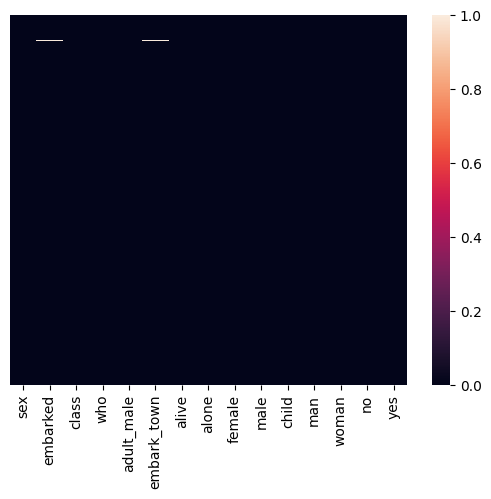

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False)

In [ ]:
df.isnull().sum()

sex            0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
female         0
male           0
child          0
man            0
woman          0
no             0
yes            0
dtype: int64

In [ ]:
df.head()

mod = df['embark_town'].mode()

mod[0]

'Southampton'

In [ ]:
df['embark_town'].fillna(mod[0], inplace=True)

df['embark_town'].value_counts()



Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [ ]:
df.isnull().sum()

sex            0
embarked       2
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
female         0
male           0
child          0
man            0
woman          0
no             0
yes            0
dtype: int64

In [ ]:
df['embark_town'].mode()

0    Southampton
Name: embark_town, dtype: object

In [ ]:
df.head()

,sex,embarked,class,who,adult_male,embark_town,alive,alone,female,male,child,man,woman,no,yes
0,male,S,2,man,True,Southampton,no,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,female,C,0,woman,False,Cherbourg,yes,False,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,female,S,2,woman,False,Southampton,yes,True,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,female,S,0,woman,False,Southampton,yes,False,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,male,S,2,man,True,Southampton,no,True,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
df.isnull().sum()

sex            0
embarked       2
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
female         0
male           0
child          0
man            0
woman          0
no             0
yes            0
dtype: int64

In [ ]:
df['embark_town'].value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [ ]:
from category_encoders import TargetEncoder

In [ ]:
!pip install category_encoders

In [ ]:
df.head()

,sex,embarked,class,who,adult_male,embark_town,alive,alone,female,male,child,man,woman,no,yes
0,male,S,2,man,True,Southampton,no,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,female,C,0,woman,False,Cherbourg,yes,False,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,female,S,2,woman,False,Southampton,yes,True,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,female,S,0,woman,False,Southampton,yes,False,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,male,S,2,man,True,Southampton,no,True,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
le = LabelEncoder()

df['alive'] = le.fit_transform(df['alive'])

In [ ]:
df.head()

,sex,embarked,class,who,adult_male,embark_town,alive,alone,female,male,child,man,woman,no,yes
0,male,S,2,man,True,Southampton,0,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,female,C,0,woman,False,Cherbourg,1,False,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,female,S,2,woman,False,Southampton,1,True,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,female,S,0,woman,False,Southampton,1,False,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,male,S,2,man,True,Southampton,0,True,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
df['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [ ]:
cols = ['sex','who','embark_town']

target = 'alive'

for col in cols:
  te = TargetEncoder()
  #fit the data
  te.fit(X=df[col],y=df[target])
  #transform
  value = te.transform(df[col])
  df = pd.concat([df, value], axis = 1)

df.head()

,sex,embarked,class,who,adult_male,embark_town,alive,alone,female,male,child,man,woman,no,yes,sex,who,embark_town
0,male,S,2,man,True,Southampton,0,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.188908,0.163873,0.339009
1,female,C,0,woman,False,Cherbourg,1,False,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.742038,0.756458,0.553571
2,female,S,2,woman,False,Southampton,1,True,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.742038,0.756458,0.339009
3,female,S,0,woman,False,Southampton,1,False,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.742038,0.756458,0.339009
4,male,S,2,man,True,Southampton,0,True,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.188908,0.163873,0.339009


In [ ]:
df.isnull().sum()

sex            0
embarked       2
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
female         0
male           0
child          0
man            0
woman          0
no             0
yes            0
dtype: int64

In [ ]:
df['alive'].value_counts()

0    549
1    342
Name: alive, dtype: int64